In [1]:
 # Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import csv

# Import API key
from config import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

630

In [3]:
#Perform a weather check on each city using a series of successive API calls.
#Include a print log of each city as it's being processed (with the city number and city name).

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_keys

# Create empty lists in which to append the API data or hold reponse info
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

# Start the call counter 
record = 1

# Log file print statement
print(f"Beginning Data Retrieval")
print(f"-------------------------------")

#Loop through the cities in the city list and perform a request for data on each
for city in cities:  
    
    # Try statement to append calls where value is found 
    # Not all calls return data as OpenWeatherMap will not have records in all the cities generated by CityPy module
    try: 
        response = requests.get(f"{url}&q={city}").json() 
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {record} | {city_record}")
        print(f"{url}&q={city}")
        
        # Increase counter by one 
        record= record + 1
        
        # Wait a second in loop to not over exceed rate limit of API
        time.sleep(1.01)
        
    # If no record found "skip" to next call
    except:
        print("City not found. Skipping...")
    continue


Beginning Data Retrieval
-------------------------------
Processing Record 1 | Dunedin
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8af867fbc762581d60af2c26f516c4f2&q=dunedin
Processing Record 2 | Mount Gambier
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8af867fbc762581d60af2c26f516c4f2&q=mount gambier
Processing Record 3 | Castro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8af867fbc762581d60af2c26f516c4f2&q=castro
Processing Record 4 | Nanortalik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8af867fbc762581d60af2c26f516c4f2&q=nanortalik
Processing Record 5 | Viedma
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8af867fbc762581d60af2c26f516c4f2&q=viedma
Processing Record 6 | Aldan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8af867fbc762581d60af2c26f516c4f2&q=aldan
City not found. Skipping...
Processing Record 7 | Severo-Kurilsk
http://api.openweather

Processing Record 57 | Samsun
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8af867fbc762581d60af2c26f516c4f2&q=samsun
Processing Record 58 | Byron Bay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8af867fbc762581d60af2c26f516c4f2&q=byron bay
Processing Record 59 | Rikitea
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8af867fbc762581d60af2c26f516c4f2&q=rikitea
Processing Record 60 | Pangnirtung
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8af867fbc762581d60af2c26f516c4f2&q=pangnirtung
Processing Record 61 | Castelo do Piaui
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8af867fbc762581d60af2c26f516c4f2&q=castelo do piaui
Processing Record 62 | Arraial do Cabo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8af867fbc762581d60af2c26f516c4f2&q=arraial do cabo
Processing Record 63 | Syracuse
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8af8

Processing Record 113 | Nikolskoye
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8af867fbc762581d60af2c26f516c4f2&q=nikolskoye
Processing Record 114 | Baykit
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8af867fbc762581d60af2c26f516c4f2&q=baykit
Processing Record 115 | Yushu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8af867fbc762581d60af2c26f516c4f2&q=yushu
Processing Record 116 | Tuatapere
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8af867fbc762581d60af2c26f516c4f2&q=tuatapere
Processing Record 117 | Sidi Ali
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8af867fbc762581d60af2c26f516c4f2&q=sidi ali
Processing Record 118 | Shingu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8af867fbc762581d60af2c26f516c4f2&q=shingu
Processing Record 119 | San Jeronimo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8af867fbc762581d60af2c26f516c4f2&

Processing Record 167 | Torbay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8af867fbc762581d60af2c26f516c4f2&q=torbay
Processing Record 168 | Gerash
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8af867fbc762581d60af2c26f516c4f2&q=gerash
Processing Record 169 | Valle de Juarez
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8af867fbc762581d60af2c26f516c4f2&q=valle de juarez
Processing Record 170 | Saint-Philippe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8af867fbc762581d60af2c26f516c4f2&q=saint-philippe
Processing Record 171 | Kirakira
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8af867fbc762581d60af2c26f516c4f2&q=kirakira
Processing Record 172 | Kaeo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8af867fbc762581d60af2c26f516c4f2&q=kaeo
Processing Record 173 | Kuching
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8af867fbc762581d60af

Processing Record 223 | Cherskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8af867fbc762581d60af2c26f516c4f2&q=cherskiy
Processing Record 224 | Kodiak
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8af867fbc762581d60af2c26f516c4f2&q=kodiak
Processing Record 225 | Ambunti
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8af867fbc762581d60af2c26f516c4f2&q=ambunti
Processing Record 226 | Nanakuli
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8af867fbc762581d60af2c26f516c4f2&q=nanakuli
Processing Record 227 | Bam
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8af867fbc762581d60af2c26f516c4f2&q=bam
Processing Record 228 | Leningradskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8af867fbc762581d60af2c26f516c4f2&q=leningradskiy
Processing Record 229 | Madimba
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8af867fbc762581d60af2c26f516c4f2&q=m

Processing Record 279 | Madang
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8af867fbc762581d60af2c26f516c4f2&q=madang
City not found. Skipping...
Processing Record 280 | Santa Cruz
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8af867fbc762581d60af2c26f516c4f2&q=santa cruz
Processing Record 281 | Taitung
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8af867fbc762581d60af2c26f516c4f2&q=taitung
Processing Record 282 | Mundo Nuevo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8af867fbc762581d60af2c26f516c4f2&q=mundo nuevo
Processing Record 283 | Cortes
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8af867fbc762581d60af2c26f516c4f2&q=cortes
Processing Record 284 | San Patricio
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8af867fbc762581d60af2c26f516c4f2&q=san patricio
City not found. Skipping...
Processing Record 285 | Krikellos
http://api.openweathermap.org/da

City not found. Skipping...
Processing Record 335 | Biskamzha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8af867fbc762581d60af2c26f516c4f2&q=biskamzha
Processing Record 336 | Alta Gracia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8af867fbc762581d60af2c26f516c4f2&q=alta gracia
Processing Record 337 | Raudeberg
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8af867fbc762581d60af2c26f516c4f2&q=raudeberg
Processing Record 338 | Ribas do Rio Pardo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8af867fbc762581d60af2c26f516c4f2&q=ribas do rio pardo
Processing Record 339 | Longyan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8af867fbc762581d60af2c26f516c4f2&q=longyan
Processing Record 340 | Churapcha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8af867fbc762581d60af2c26f516c4f2&q=churapcha
Processing Record 341 | Boma
http://api.openweathermap.org/data/2.5/weat

Processing Record 390 | Camacha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8af867fbc762581d60af2c26f516c4f2&q=camacha
Processing Record 391 | Mikun
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8af867fbc762581d60af2c26f516c4f2&q=mikun
Processing Record 392 | Mandalgovi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8af867fbc762581d60af2c26f516c4f2&q=mandalgovi
Processing Record 393 | Desbiens
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8af867fbc762581d60af2c26f516c4f2&q=desbiens
Processing Record 394 | Auki
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8af867fbc762581d60af2c26f516c4f2&q=auki
Processing Record 395 | Solntsevo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8af867fbc762581d60af2c26f516c4f2&q=solntsevo
Processing Record 396 | Harper
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8af867fbc762581d60af2c26f516c4f2&q=harper

Processing Record 446 | Wharton
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8af867fbc762581d60af2c26f516c4f2&q=wharton
Processing Record 447 | Curup
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8af867fbc762581d60af2c26f516c4f2&q=curup
City not found. Skipping...
Processing Record 448 | Evensk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8af867fbc762581d60af2c26f516c4f2&q=evensk
Processing Record 449 | Kyzyl-Suu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8af867fbc762581d60af2c26f516c4f2&q=kyzyl-suu
Processing Record 450 | Lom Sak
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8af867fbc762581d60af2c26f516c4f2&q=lom sak
Processing Record 451 | Bushenyi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8af867fbc762581d60af2c26f516c4f2&q=bushenyi
Processing Record 452 | Ola
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8af867fbc762581d60

Processing Record 502 | Bulgan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8af867fbc762581d60af2c26f516c4f2&q=bulgan
Processing Record 503 | Riberalta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8af867fbc762581d60af2c26f516c4f2&q=riberalta
Processing Record 504 | Ucluelet
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8af867fbc762581d60af2c26f516c4f2&q=ucluelet
Processing Record 505 | Port Hardy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8af867fbc762581d60af2c26f516c4f2&q=port hardy
Processing Record 506 | Muros
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8af867fbc762581d60af2c26f516c4f2&q=muros
Processing Record 507 | Lima
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8af867fbc762581d60af2c26f516c4f2&q=lima
Processing Record 508 | Teeli
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8af867fbc762581d60af2c26f516c4f2&q=teeli
Pro

Processing Record 558 | Livingstonia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8af867fbc762581d60af2c26f516c4f2&q=livingstonia
Processing Record 559 | Palmer
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8af867fbc762581d60af2c26f516c4f2&q=palmer
Processing Record 560 | Guiren
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8af867fbc762581d60af2c26f516c4f2&q=guiren
Processing Record 561 | Imeni Poliny Osipenko
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8af867fbc762581d60af2c26f516c4f2&q=imeni poliny osipenko
Processing Record 562 | Sambava
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8af867fbc762581d60af2c26f516c4f2&q=sambava
City not found. Skipping...
Processing Record 563 | Igrim
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8af867fbc762581d60af2c26f516c4f2&q=igrim
Processing Record 564 | Mantua
http://api.openweathermap.org/data/2.5/weather?units=

In [4]:
# Create a dictonary with the lists generated
weatherpy_dict = {
    "City": city_name,
    "Cloudiness":cloudiness, 
    "Country":country,
    "Date":date, 
    "Humidity": humidity,
    "Lat":lat, 
    "Lng":lng, 
    "Max Temp": max_temp,
    "Wind Speed":wind_speed
}

# Create a data frame from dictionary
weather_data = pd.DataFrame(weatherpy_dict)

# Display count of weather data values 
weather_data.count()

City          569
Cloudiness    569
Country       569
Date          569
Humidity      569
Lat           569
Lng           569
Max Temp      569
Wind Speed    569
dtype: int64

In [6]:
# Save data frame to CSV
weather_data.to_csv("weather_data.csv", encoding='utf-8', index=False)

# Display data frame head 
weather_data.head()


City  Cloudiness Country        Date  Humidity    Lat     Lng  \
0        Dunedin          92      NZ  1551933471        80 -45.87  170.50   
1  Mount Gambier           8      AU  1551931200        30 -37.83  140.78   
2         Castro          75      CL  1551931200        93 -42.48  -73.76   
3     Nanortalik          80      GL  1551933886        90  60.14  -45.24   
4         Viedma          92      AR  1551933946        34 -40.81  -62.99   

   Max Temp  Wind Speed  
0     59.00       20.00  
1     69.80        9.17  
2     51.80        5.82  
3     31.19       13.44  
4     77.41       23.29

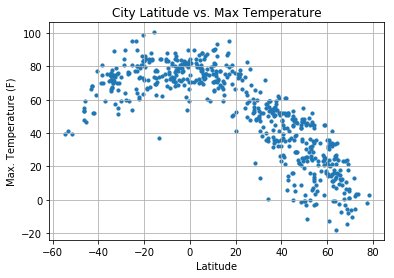

In [7]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Max_Temp_vs_Latitude.png")

# Show plot
plt.show()

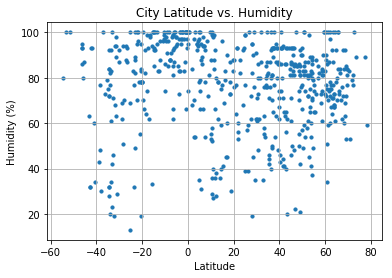

In [8]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Humidity_vs_Latitude.png")

# Show plot
plt.show()

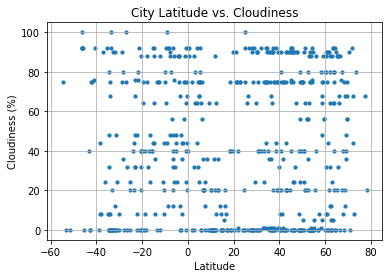

In [9]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Cloudiness_vs_Latitude.png")

# Show plot
plt.show()

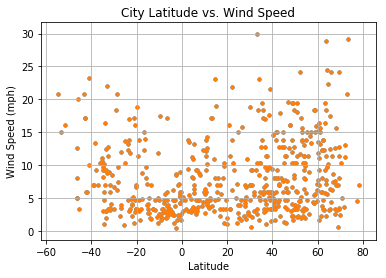

In [11]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Wind_Speed_vs_Latitude.png")

# Show plot
plt.show()